## 手写数字的分类


### 1. 数据集准备
- 使用MNIST数据集，该数据集包含60,000张训练图片和10,000张测试图片，每张图片都是28x28像素的灰度图像。

- **数据样式**
	- 将手写数字图像转换为灰度图像, 并分为28\*28个分块, 表示为一个28\*28的矩阵, 有数字部分(即白色)的分块为1, 无数字的部分(即黑色)的分块为0, 然后将这些以行优先的顺序, 排列为一个一维的数组, 可以认为该数组的每个元素, 就是表示一个像素点.
	- MNIST数据集每行表示一个图片, 及对应的数字标签, 每行共有28*28=784列 + 1列.

### 2. 算法选择
- 使用Python的机器学习库，如scikit-learn，来实现机器学习的分类算法。

- 算法选择与参数调整：
    + **决策树（Decision Tree）** ：使用sklearn.tree.DecisionTreeClassifier，调整参数如max_depth（最大深度）和criterion（划分节点的评价准则，如gini和entropy）。
    + **随机森林（Random Forest）** ：使用sklearn.ensemble.RandomForestClassifier，调整参数如树的数量和最大深度。

- 模型训练与评估：
    将数据集划分为训练集和测试集，分别用于模型训练和性能评估。
    使用交叉验证和网格搜索来优化模型参数。
    计算并比较不同算法的准确率、精确度、召回率和F1值等指标。

### 3. 参数调整
- 对每种算法进行参数调整，例如：
	- 决策树：树的深度、分裂所需的最小样本数等。
	- 随机森林：树的数量、树的最大深度等。

### 4. 训练与测试
- 对每种算法使用训练数据集进行训练，并在测试数据集上进行评估。

### 5. 预测与分析
- 比较不同算法在测试集上的准确率。
- 分析每种算法的优缺点和适用场景。

- **算法特性及其原因**：
	- 决策树易于理解和解释，但容易过拟合。
	- 随机森林通过集成多个决策树提高了预测的稳定性和准确性，但计算成本较高。

- **适用场景**：
    - 决策树：适用于特征较少且关系较为简单的任务，如简单的分类问题。
    - 随机森林：适用于大数据集和需要高准确率的任务，如大规模的手写数字识别。

- **结果对比**:
    - 在手写数字识别任务中，随机森林通常表现较好，而决策树在此任务中表现较差。

### 6. 不选用SVM
- SVM：适用于小样本、高维数据和非线性特征的分类任务.
- 对于使用SVM分类手写数据集的时候, 不论选择何种核函数, 拟合时间都很长, 甚至得不出结果。
- 分析每种算法的优缺点和适用场景。


In [9]:
from sklearn.datasets import fetch_openml


# 加载数据集
mnist = fetch_openml('mnist_784', version=1)

print(mnist["data"])
print(mnist["target"])


       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [10]:
# 预测评判模块
import time
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


# 对数据进行切分
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.3, random_state=42)


深度为2时, 模型训练用时0.9063210487365723s,  预测结果的准确度:0.33695238095238095
深度为4时, 模型训练用时1.8490324020385742s,  预测结果的准确度:0.5608571428571428
深度为6时, 模型训练用时2.9832043647766113s,  预测结果的准确度:0.7238095238095238
深度为8时, 模型训练用时4.2400712966918945s,  预测结果的准确度:0.8047619047619048
深度为10时, 模型训练用时5.687472343444824s,  预测结果的准确度:0.8537619047619047
深度为12时, 模型训练用时6.408067464828491s,  预测结果的准确度:0.8683333333333333
深度为14时, 模型训练用时7.408345937728882s,  预测结果的准确度:0.8706666666666667
深度为16时, 模型训练用时8.139555215835571s,  预测结果的准确度:0.8719523809523809


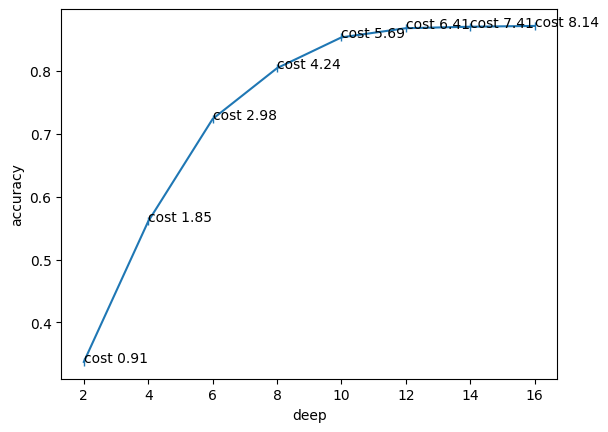

In [ ]:
# 决策树

from sklearn.tree import DecisionTreeClassifier

draw_x = list()
draw_y = list()
time_costs = list()

# 对于不同的决策树深度, 预测结果的好坏
for deep in range(2, 17, 2):
    # 训练模型的开始时间
    start_time = time.time()

    # 决策树模型
    model_dt = DecisionTreeClassifier(max_depth=deep)
    # 进行拟合
    model_dt.fit(x_train, y_train)

    # 训练模型的结束时间
    end_time = time.time()

    # 进行预测分类
    dt_pred = model_dt.predict(x_test)

    # 获得决策树预测结果的评估
    dt_accuracy = accuracy_score(y_test, dt_pred)

    cost = end_time - start_time
    time_costs.append(cost)
    print(f"深度为{deep}时, 模型训练用时{cost}s,  预测结果的准确度:{dt_accuracy}")
    draw_x.append(deep)
    draw_y.append(dt_accuracy)


# 绘制深度与准确率的关系
plt.plot(draw_x, draw_y, marker="|")
# 模型训练时间标注
for i in range(0, len(time_costs)):
	plt.text(draw_x[i], draw_y[i], "cost " + str(round(time_costs[i], 2)))
# 设置绘图
ax = plt.gca()
ax.set_xlabel("deep")
ax.set_ylabel("accuracy")
plt.show()

可以看出, 对于决策树, 当树的深度达到10后, 之后在提升深度, 对分类的准确率影响都不大了.

对于单个决策树, 分类的准确率可以达到87%, 模型构建在6s.

树的数量为50, 每棵树深度为4时, 模型训练用时2.422084331512451s, 预测结果的准确度:0.802
树的数量为50, 每棵树深度为6时, 模型训练用时4.13197135925293s, 预测结果的准确度:0.8838095238095238
树的数量为50, 每棵树深度为8时, 模型训练用时6.206432819366455s, 预测结果的准确度:0.9210952380952381
树的数量为100, 每棵树深度为4时, 模型训练用时4.904933452606201s, 预测结果的准确度:0.8139047619047619
树的数量为100, 每棵树深度为6时, 模型训练用时7.848407030105591s, 预测结果的准确度:0.8833809523809524
树的数量为100, 每棵树深度为8时, 模型训练用时11.737230062484741s, 预测结果的准确度:0.924047619047619
树的数量为150, 每棵树深度为4时, 模型训练用时7.107585430145264s, 预测结果的准确度:0.8168095238095238
树的数量为150, 每棵树深度为6时, 模型训练用时12.202884435653687s, 预测结果的准确度:0.8897619047619048
树的数量为150, 每棵树深度为8时, 模型训练用时17.247050762176514s, 预测结果的准确度:0.9235714285714286


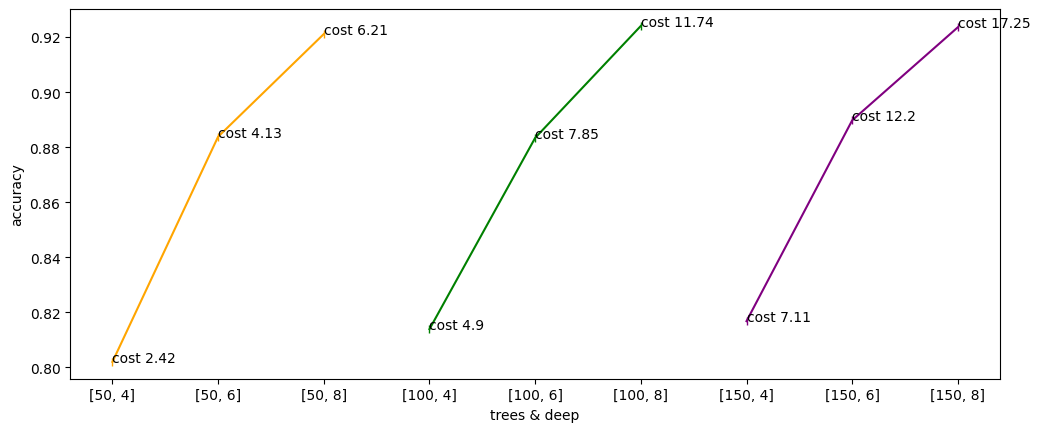

In [13]:
# 随机森林

from sklearn.ensemble import RandomForestClassifier

draw_x = list()
draw_y = list()
time_costs = list()

# 不同树的数量和树的深度, 对预测结果的影响
tree_deep = [[50, 4], [50, 6], [50, 8],
             [100, 4], [100, 6], [100, 8],
             [150, 4], [150, 6], [150, 8]]
for trees, deep in tree_deep:
    # 训练模型的开始时间
    start_time = time.time()

    # 随机森林模型
    model_rf = RandomForestClassifier(n_estimators=trees, max_depth=deep)
    # 进行拟合
    model_rf.fit(x_train, y_train)

    # 训练模型的结束时间
    end_time = time.time() 

    # 进行预测分类
    rf_pred = model_rf.predict(x_test)

    # 获得随机森林预测结果的评估 
    rf_accuracy = accuracy_score(y_test, rf_pred)

    cost = end_time - start_time
    time_costs.append(cost)
    print(f"树的数量为{trees}, 每棵树深度为{deep}时, 模型训练用时{cost}s, 预测结果的准确度:{rf_accuracy}")
    draw_y.append(rf_accuracy)


# 绘制树的个数与单个树深度 和准确度的关系
draw_x = [x for x in range(1, len(tree_deep)+1)]
plt.plot(draw_x[0:3], draw_y[0:3], color="orange", marker="|")
plt.plot(draw_x[3:6], draw_y[3:6], color="green", marker="|")
plt.plot(draw_x[6:9], draw_y[6:9], color="purple", marker="|")
# 模型训练时间标注
for i in range(0, len(time_costs)):
    plt.text(draw_x[i], draw_y[i], "cost " + str(round(time_costs[i], 2)))
# 设置绘图
ax = plt.gca()
ax.set_xticks(draw_x)
ax.set_xticklabels([str(rd) for rd in tree_deep])
ax.set_xlabel("trees & deep")
ax.set_ylabel("accuracy")
fig = plt.gcf()
fig.set_figwidth(12)
plt.show()


可以看出, 对于决策森林, 提升森林中的树的个数对分类有一定的提升, 提升单个树深度对预测的准确度具有明显的提升, 但是, 对于过多的树个数与单个树的深度, 会影响模型生成时间, 在树个数为50~100, 单个树深度为8的时候, 是最优的.

对于随机森林, 分类的准确率可以达到92%, 模型构建50棵树的8层随机森林模型在6s. 优于决策树.